## Env

In [29]:
import numpy as np
import pandas as pd

## surprise package 설치
- MacOS, New anaconda environment 생성 후, 아래 명령어로 설치
```bash
>>> conda install numpy pandas
>>> conda install –c conda-forge scikit-surprise
```


### Surprise - getting started

In [30]:
# surprise load 확인
from surprise import Dataset

In [31]:
# 필요한 Surprise 알고리즘 불러오기
from surprise import BaselineOnly
from surprise import KNNWithMeans
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

In [32]:
# MovieLens 100K 데이터 불러오기
data = Dataset.load_builtin('ml-100k')

In [33]:
data

In [34]:
!ls -al /root/.surprise_data/ml-100k/ml-100k

ls: /root/.surprise_data/ml-100k/ml-100k: No such file or directory


In [35]:
# Train/Test 분리
trainset, testset = train_test_split(data, test_size=0.25)

In [36]:
print(trainset, '\n')
print(testset)


[('655', '46', 4.0), ('684', '49', 4.0), ('537', '315', 4.0), ('660', '366', 1.0), ('42', '86', 3.0), ('543', '66', 3.0), ('682', '447', 2.0), ('213', '1012', 3.0), ('548', '295', 5.0), ('542', '70', 4.0), ('90', '521', 4.0), ('328', '318', 5.0), ('268', '391', 3.0), ('104', '324', 1.0), ('894', '52', 4.0), ('90', '143', 5.0), ('513', '763', 3.0), ('230', '926', 3.0), ('178', '454', 4.0), ('618', '477', 2.0), ('62', '827', 2.0), ('405', '583', 1.0), ('881', '441', 2.0), ('766', '674', 3.0), ('87', '222', 4.0), ('299', '531', 3.0), ('887', '274', 1.0), ('899', '515', 3.0), ('345', '866', 3.0), ('859', '475', 4.0), ('350', '489', 4.0), ('104', '3', 3.0), ('347', '202', 4.0), ('131', '19', 4.0), ('733', '286', 4.0), ('805', '168', 5.0), ('727', '167', 2.0), ('504', '773', 3.0), ('851', '9', 4.0), ('222', '67', 4.0), ('895', '748', 3.0), ('506', '435', 5.0), ('835', '131', 5.0), ('270', '569', 4.0), ('440', '329', 5.0), ('291', '69', 5.0), ('167', '404', 3.0), ('551', '292', 3.0), ('889',

In [37]:
# 정확도 계산
algo = KNNWithMeans()
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9575


0.9575411945133581

In [38]:
algo

In [39]:
# list type
predictions[:10]

[Prediction(uid='655', iid='46', r_ui=4.0, est=3.0204801483359973, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid='684', iid='49', r_ui=4.0, est=3.3051262305421654, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='537', iid='315', r_ui=4.0, est=3.4950389650303797, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='660', iid='366', r_ui=1.0, est=2.446923254255086, details={'actual_k': 33, 'was_impossible': False}),
 Prediction(uid='42', iid='86', r_ui=3.0, est=3.81045713929658, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='543', iid='66', r_ui=3.0, est=3.280015980664736, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='682', iid='447', r_ui=2.0, est=2.9267880071178114, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='213', iid='1012', r_ui=3.0, est=4.34715204603444, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='548', iid='295', r_ui=5.0, est=3.

In [40]:
accuracy

<module 'surprise.accuracy' from '/opt/anaconda3/envs/surprise_env/lib/python3.9/site-packages/surprise/accuracy.py'>

In [41]:
# famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation
cross_validate(algo, data, measures=["RMSE", "MAE"], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9405  0.9314  0.9299  0.9327  0.9482  0.9365  0.0069  
MAE (testset)     0.7405  0.7334  0.7339  0.7362  0.7465  0.7381  0.0049  
Fit time          0.41    0.42    0.42    0.41    0.42    0.41    0.01    
Test time         0.10    0.05    0.10    0.05    0.05    0.07    0.03    


{'test_rmse': array([0.94051186, 0.93141164, 0.9298824 , 0.93270369, 0.94820091]),
 'test_mae': array([0.74048125, 0.73336146, 0.73392879, 0.73620647, 0.74654504]),
 'fit_time': (0.4059767723083496,
  0.4223628044128418,
  0.41727185249328613,
  0.4131491184234619,
  0.41588497161865234),
 'test_time': (0.1012721061706543,
  0.0465390682220459,
  0.10165596008300781,
  0.046552181243896484,
  0.045130014419555664)}

In [42]:
from surprise import Dataset, KNNBasic

# Load the movielens-100k dataset
data = Dataset.load_builtin("ml-100k")

# Retrieve the trainset.
trainset = data.build_full_trainset()

# Build an algorithm, and train it.
algo = KNNBasic()
algo.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [45]:
trainset

In [44]:
print(trainset)

In [46]:
uid = str(196)  # raw user id 
iid = str(302)  # raw item id 

# 특정 사용자 및 항목에 대한 예측 값
pred = algo.predict(uid, iid, r_ui=4, verbose=True)

user: 196        item: 302        r_ui = 4.00   est = 4.06   {'actual_k': 40, 'was_impossible': False}


### Surprise - 알고리즘 옵션 변경, 정확도 계산

In [50]:
# 알고리즘 옵션 변경, 정확도 계산
sim_options = {'name': 'pearson_baseline',
               'user_based': True}

### option
- 'name': 유사도지표의 종류, cosine/ msd, pearson. peason_baseline
- 'user_based': True( 사용자기반 협업), False(item 기반 협업)

In [51]:
algo = KNNWithMeans(k=30, sim_options=sim_options)
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [52]:
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.4698


0.4697563346514059

### Surprise - 알고리즘 비교

In [53]:
# 알고리즘 비교
algorithms = [BaselineOnly, KNNWithMeans, SVD, SVDpp]
names = []
results = []

for option in algorithms:
    algo = option()
    names.append(option.__name__)       # 알고리즘 이름
    algo.fit(trainset)
    predictions = algo.test(testset)
    results.append(accuracy.rmse(predictions))
    
names = np.array(names)
results = np.array(results)

Estimating biases using als...
RMSE: 0.9262
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.7763
RMSE: 0.6812
RMSE: 0.7618


In [56]:
predictions[:10]

[Prediction(uid='655', iid='46', r_ui=4.0, est=3.567284866612345, details={'was_impossible': False}),
 Prediction(uid='684', iid='49', r_ui=4.0, est=3.485372738997077, details={'was_impossible': False}),
 Prediction(uid='537', iid='315', r_ui=4.0, est=3.4657589341244983, details={'was_impossible': False}),
 Prediction(uid='660', iid='366', r_ui=1.0, est=2.020022069977263, details={'was_impossible': False}),
 Prediction(uid='42', iid='86', r_ui=3.0, est=3.363466714487014, details={'was_impossible': False}),
 Prediction(uid='543', iid='66', r_ui=3.0, est=3.0607059964172794, details={'was_impossible': False}),
 Prediction(uid='682', iid='447', r_ui=2.0, est=2.9852326708045562, details={'was_impossible': False}),
 Prediction(uid='213', iid='1012', r_ui=3.0, est=4.008170163891288, details={'was_impossible': False}),
 Prediction(uid='548', iid='295', r_ui=5.0, est=3.680374427804744, details={'was_impossible': False}),
 Prediction(uid='542', iid='70', r_ui=4.0, est=3.701247632083567, details=

In [59]:
# 알고리즘별 RMSE 결과 ([BaselineOnly, KNNWithMeans, SVD, SVDpp])
results

array([0.92622811, 0.77626319, 0.6811659 , 0.76176791])

array([0.6811659 , 0.76176791, 0.77626319, 0.92622811])

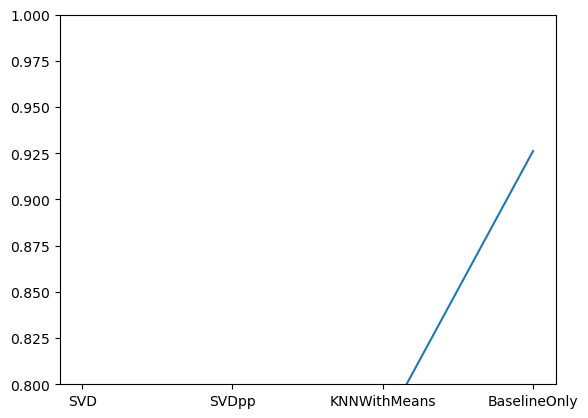

In [54]:
# 결과를 그래프로 표시
import matplotlib.pyplot as plt

index = np.argsort(results)
plt.ylim(0.8, 1)
plt.plot(names[index], results[index])
results[index]

In [60]:
# index = np.argsort(results)
index

array([2, 3, 1, 0])

- `np.argsort()`: 값을 직접 정렬하지 않고, 원소들의 인덱스를 반환
    - 반환된 인덱스를 사용해 원본 배열을 정렬된 순서로 재배열 가능

### Surprise - Neighbor size 비교

In [64]:
# 다양한 Neighbor size 비교
result = []
for neighbor_size in range(1, 10):
    algo = KNNWithMeans(k=neighbor_size, sim_options={'name':'pearson_baseline', 'user_based': True})
    algo.fit(trainset)
    predictions = algo.test(testset)
    result.append([neighbor_size, accuracy.rmse(predictions)])
result

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.0000
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.1338
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.1874
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.2251
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.2560
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.2813
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.3025
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done co

[[1, 0.0],
 [2, 0.1338458869340402],
 [3, 0.1874255521035977],
 [4, 0.22508242820172436],
 [5, 0.2560065577243984],
 [6, 0.2812926840463671],
 [7, 0.30245424781332414],
 [8, 0.32020605684461584],
 [9, 0.33615156627437853]]

### Surprise - Grid Search
- 서로 다른 parameter의 다양한 조합

In [65]:
# KNN 다양한 파라미터 비교
from surprise.model_selection import GridSearchCV
param_grid = {'k': [5, 10, 15, 25],  # 유사도에 따라 고려할 이웃의 개수
              'sim_options': {'name': ['pearson_baseline', 'cosine'],  # Pearson, Cosine 유사도
                              'user_based': [True, False]}             # 사용자 기반, 아이템 기반 
             } # 유사도 계산 방식 설정

- `비교 대상`
    - 'name': ['pearson_baseline', 'cosine']
        - 'pearson_baseline': Pearson 상관계수를 기반으로 유사도를 계산 / 편향(bias)을 고려해 계산
        - 'cosine': 코사인 유사도를 사용해 두 벡터의 방향을 기반으로 유사도를 계산
    - 'user_based': [True, False]
        - True: 사용자 기반 협업 필터링을 수행 (User-User Similarity).
        - False: 아이템 기반 협업 필터링을 수행 (Item-Item Similarity).

In [69]:
gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse'], cv=4)
gs.fit(data)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similar

In [71]:
# 최적 RMSE 출력
print(gs.best_score['rmse'])

0.9270006095419524


In [72]:
# 최적 RMSE의 parameter
print(gs.best_params['rmse'])

{'k': 25, 'sim_options': {'name': 'pearson_baseline', 'user_based': False}}


### SVD 알고리듬의 parameter 비교

In [73]:
# SVD 다양한 파라메터 비교
from surprise.model_selection import GridSearchCV

param_grid = {'n_epochs': [70, 80, 90],           # epoch 수 : 모델 학습 반복 횟수
              'lr_all': [0.005, 0.006, 0.007],    # 학습률 : 모델 파라미터 업데이트 속도
              'reg_all': [0.05, 0.07, 0.1]}       # 정규화 항 : 모델의 과적합을 방지하기 위해 사용

- Suprise 라이브러리에서는 정규화 항은 `L2 정규화` 를 사용한다.
    - 손실 함수에 가중치의 제곱합을 패널티로 추가
    - SVD 손실 함수 : $\text{Loss} = \sum_{(u, i) \in \mathcal{R}} \left( r_{ui} - \hat{r}_{ui} \right)^2 + \lambda \left( ||P||^2 + ||Q||^2 + ||b_u||^2 + ||b_i||^2 \right)$
        - $r_{ui}$ : 실제 평점
        - $\hat{r}_{ui}$ : 예측 평점
        - $P, Q$ : 사용자와 아이템의 잠재 요인 행렬
        - $b_u, b_i$ : 사용자와 아이템의 편향(bias)
        - $\lambda$ : 정규화 강도(reg_all)
    - 여기서 L2 정규화는 $||P||^2$ 를 의미

In [74]:
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=4)
gs.fit(data)

In [75]:
# 최적 RMSE 출력
print(gs.best_score['rmse'])

# 최적 RMSE의 parameter
print(gs.best_params['rmse'])

0.9119513992527611
{'n_epochs': 90, 'lr_all': 0.005, 'reg_all': 0.1}


---

### Surprise - 외부 데이터 불러오기

In [76]:
# csv 파일에서 불러오기
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('/Users/jun/Library/Mobile Documents/com~apple~CloudDocs/Github/ai _recommendation _system/data/u.data', names=r_cols,  sep='\t',encoding='latin-1')
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(ratings[['user_id', 'movie_id',
        'rating']], reader)

- Surprise의 Reader 클래스
    - 사용자-아이템 평점 데이터의 `형식`과 평점의 `범위`를 명시적으로 정의하는 역할
    - `Reader(rating_scale=(1,5))` : 평점의 최소값과 최대값을 1부터 5까지로 정의

In [77]:
# Train/Test 분리
trainset, testset = train_test_split(data, test_size=0.25)

In [78]:
# 정확도 계산
algo = KNNWithMeans()
algo.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [79]:
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.9545


0.9544706476379529